<a href="https://colab.research.google.com/github/bwilder95/MIT_Intro_to_ML/blob/main/MIT_6_036_hw04_Colab_notebook_(OLL)WILDER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIT 6.036 Spring 2019: Homework 4
This homework does not include provided Python code. Instead, we
encourage you to write your own code to help you answer some of these
problems, and/or test and debug the code components we do ask for.
Some of the problems below are simple enough that hand calculation
should be possible; your hand solutions can serve as test cases for
your code.  You may also find that including utilities written in
previous labs (like a `sd` or signed distance function) will be
helpful, as you build up additional functions and utilities for
calculation of margins, different loss functions, gradients, and other
functions needed for margin maximization and gradient descent.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Warm up
# 2) Margin Practice

In [2]:
data = np.array([[3,2], [1,1], [4,2]]).T
labels = np.array([1,-1, -1])
theta = np.array([[1,1]]).T
theta_0 = -4
print(data,labels.shape)

[[3 1 4]
 [2 1 2]] (3,)


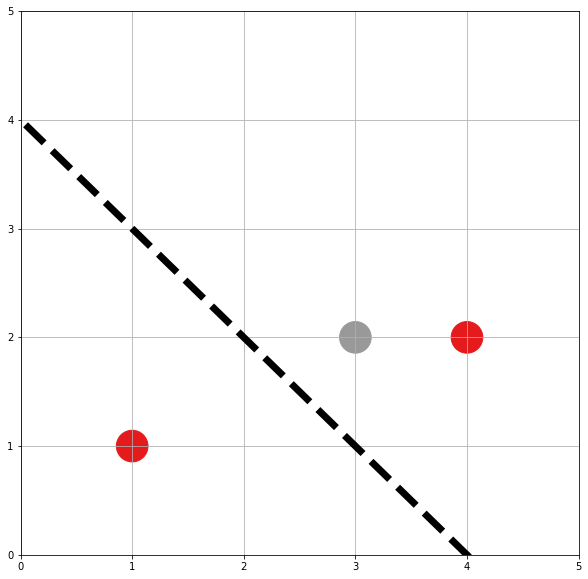

In [3]:
x,y = data
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
ax.scatter(x, y, c=labels, cmap='Set1',marker='o',s=1000)

x1 = np.linspace(-10,10,100)
x2 = -theta[0,:]/theta[1,:] * x1 - theta_0/theta[1,:]
ax.plot(x1, x2, 'black',linewidth=7,linestyle='--')

plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

In [4]:
# find margin for all three points
def margin(x,y,theta,theta_0):
  """
  x = list of data (x1,x2)
  y = integer of label (-1 or 1)
  theta = array represent linear separator 
  theta_0 = integer represent linear separator

  """
  print('')

  return y * ((theta.T@x+theta_0) / np.linalg.norm(theta))

In [5]:
print('1st point margin = ' + str(margin([3,2],1,theta,theta_0)))
print('2nd point margin = ' + str(margin([1,1],-1,theta,theta_0)))
print('3rd point margin = ' + str(margin([4,2],-1,theta,theta_0)))
print('--------------------------------------------------------')
print('solution -->  [0.70710678, 1.41421356, -1.41421356]')


1st point margin = [0.70710678]

2nd point margin = [1.41421356]

3rd point margin = [-1.41421356]
--------------------------------------------------------
solution -->  [0.70710678, 1.41421356, -1.41421356]


# 3) Max Margin Separator

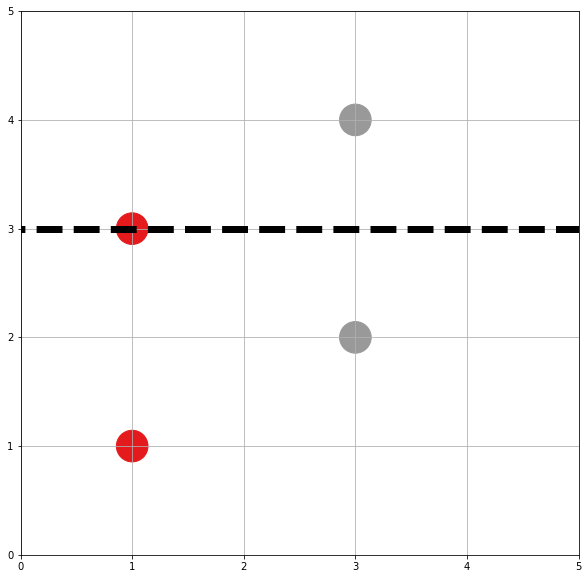

In [6]:
data = np.array([[1,3], [1,1], [3,4] , [3,2]]).T
labels = np.array([-1,-1, 1,1])
theta = np.array([[0,1]]).T
theta_0 = -3

xd,yd = data
fig, ax = plt.subplots(figsize=(10,10))
ax.grid(True)
ax.scatter(xd, yd, c=labels, cmap='Set1',marker='o',s=1000)

x1 = np.linspace(-10,10,100)
x2 = -theta[0,:]/theta[1,:] * x1 - theta_0/theta[1,:]
ax.plot(x1, x2, 'black',linewidth=7,linestyle='--')

plt.ylim(0,5)
plt.xlim(0,5)
plt.show()

In [7]:
print('1st point margin = ' + str(margin([1,3],-1,theta,theta_0)))
print('2nd point margin = ' + str(margin([1,1],-1,theta,theta_0)))
print('3rd point margin = ' + str(margin([3,4],1,theta,theta_0)))
print('4th point margin = ' + str(margin([3,2],1,theta,theta_0)))


1st point margin = [-0.]

2nd point margin = [2.]

3rd point margin = [1.]

4th point margin = [-1.]


In [8]:
# Perceptron algorithm with offset.
# data is dimension d by n
# labels is dimension 1 by n
# T is a positive integer number of steps to run
def perceptron(data, labels, hook, params = {}):
    # if T not in params, default to 100
    T = params.get('T', 50)
    (d, n) = data.shape

    theta = np.zeros((d, 1)); theta_0 = np.zeros((1, 1))
    for t in range(T):
        for i in range(n):
            x = data[:,i:i+1]
            y = labels[i:i+1]
            if y * positive(x, theta, theta_0) <= 0.0:
                theta = theta + y * x
                theta_0 = theta_0 + y
                if t == hook:
                  return theta, theta_0
    return theta, theta_0


def positive(x, th, th0):
    return np.sign(th.T@x + th0)




In [9]:
data = np.array([[1,3], [1,1], [3,4] , [3,2]]).T
labels = np.array([-1,-1, 1,1])

print(perceptron(data,labels,hook=None))

print('correct answer is ' + '[1, 0, -2]')

(array([[ 5.],
       [-2.]]), array([[-5.]]))
correct answer is [1, 0, -2]


# Start of HW 4

### 1) Margin

In [10]:
data = np.array([[1, 2, 1, 2, 10, 10.3, 10.5, 10.7],
                 [1, 1, 2, 2,  2,  2,  2, 2]])

labels = np.array([[-1, -1, 1, 1, 1, 1, 1, 1]])
blue_th = np.array([[0, 1]]).T
blue_th0 = -1.5
red_th = np.array([[1, 0]]).T
red_th0 = -2.5

In [11]:
# find margin for all three points
def margin(x,y,theta,theta_0):
  """
  x = list of data (x1,x2)
  y = integer of label (-1 or 1)
  theta = array represent linear separator 
  theta_0 = integer represent linear separator

  """
  print('')
  Smax = np.max(y * ((theta.T@x+theta_0) / np.linalg.norm(theta)))
  Smin = np.min(y * ((theta.T@x+theta_0) / np.linalg.norm(theta)))
  Ssum = np.sum(y * ((theta.T@x+theta_0) / np.linalg.norm(theta)))
  return (Ssum,Smin,Smax)

In [12]:
# blue separator  Smax = max(y * ((theta.T@x+theta_0) / np.linalg.norm(theta)))
margin(data,labels,blue_th,blue_th0)

(4.0, 0.5, 0.5)

In [13]:
# red separator
margin(data,labels,red_th,red_th0)

(31.5, -1.5, 8.2)

## 6) Implementing gradient descent
In this section we will implement generic versions of gradient descent and apply these to the SVM objective.

<b>Note: </b> If you need a refresher on gradient descent,
you may want to reference
<a href="https://openlearninglibrary.mit.edu/courses/course-v1:MITx+6.036+1T2019/courseware/Week4/gradient_descent/2">this week's notes</a>.

### 6.1) Implementing Gradient Descent
We want to find the $x$ that minimizes the value of the *objective
function* $f(x)$, for an arbitrary scalar function $f$.  The function
$f$ will be implemented as a Python function of one argument, that
will be a numpy column vector.  For efficiency, we will work with
Python functions that return not just the value of $f$ at $f(x)$ but
also return the gradient vector at $x$, that is, $\nabla_x f(x)$.

We will now implement a generic gradient descent function, `gd`, that
has the following input arguments:

* `f`: a function whose input is an `x`, a column vector, and
  returns a scalar.
* `df`: a function whose input is an `x`, a column vector, and
  returns a column vector representing the gradient of `f` at `x`.
* `x0`: an initial value of $x$, `x0`, which is a column vector.
* `step_size_fn`: a function that is given the iteration index (an
  integer) and returns a step size.
* `max_iter`: the number of iterations to perform

Our function `gd` returns a tuple:

* `x`: the value at the final step
* `fs`: the list of values of `f` found during all the iterations (including `f(x0)`)
* `xs`: the list of values of `x` found during all the iterations (including `x0`)

**Hint:** This is a short function!

**Hint 2:** If you do `temp_x = x` where `x` is a vector
(numpy array), then `temp_x` is just another name for the same vector
as `x` and changing an entry in one will change an entry in the other.
You should either use `x.copy()` or remember to change entries back after modification.

Some utilities you may find useful are included below.

In [58]:
def rv(value_list):
    return np.array([value_list])

def cv(value_list):
    return np.transpose(rv(value_list))

def f1(x):
    return float((2 * x + 3)**2)

def df1(x):
    return 2 * 2 * (2 * x + 3)

def f2(v):
    x = float(v[0]); y = float(v[1])
    return (x - 2.) * (x - 3.) * (x + 3.) * (x + 1.) + (x + y -1)**2

def df2(v):
    x = float(v[0]); y = float(v[1])
    return cv([(-3. + x) * (-2. + x) * (1. + x) + \
               (-3. + x) * (-2. + x) * (3. + x) + \
               (-3. + x) * (1. + x) * (3. + x) + \
               (-2. + x) * (1. + x) * (3. + x) + \
               2 * (-1. + x + y),
               2 * (-1. + x + y)])

The main function to implement is `gd`, defined below.

In [59]:
def gd(f, df, x0, step_size_fn, max_iter):
  # define initial conditions
  j = 0
  x = x0
  xs = []
  fs = []

  # append initial x0 and f to list 
  xs.append(x)
  fs.append(f(x))

  # initiate while loop with gradient descent
  while j <= max_iter:
    xold = x
    x = xold - step_size_fn(j)*df(x)
    xs.append(x)
    fs.append(f(x))
    j += 1
  
  return (x,fs,xs)

To evaluate results, we also use a simple `package_ans` function,
which checks the final `x`, as well as the first and last values in
`fs`, `xs`.

In [60]:
def package_ans(gd_vals):
    x, fs, xs = gd_vals
    return [x.tolist(), [fs[0], fs[-1]], [xs[0].tolist(), xs[-1].tolist()]]

The test cases are provided below, but you should feel free (and are encouraged!) to write more of your own.

In [61]:
# Test case 1
ans=package_ans(gd(f1, df1, cv([0.]), lambda i: 0.1, 1000))
print(ans)

# Test case 2
ans=package_ans(gd(f2, df2, cv([0., 0.]), lambda i: 0.01, 1000))
print(ans)

print('correct!!! lets go!')

[[[-1.5]], [9.0, 0.0], [[[0.0]], [[-1.5]]]]
[[[-2.205823904175539], [3.205823891191735]], [19.0, -20.967239611348745], [[[0.0], [0.0]], [[-2.205823904175539], [3.205823891191735]]]]
correct!!! lets go!


### 6.2) Numerical Gradient
Getting the analytic gradient correct for complicated functions is
tricky.  A very handy method of verifying the analytic gradient or
even substituting for it is to estimate the gradient at a point by
means of *finite differences*.

Assume that we are given a function $f(x)$ that takes a column vector
as its argument and returns a scalar value.  In gradient descent, we
will want to estimate the gradient of $f$ at a particular $x_0.$

The $i^{th}$ component of $\nabla_x f(x_0)$ can be estimated as
$$\frac{f(x_0+\delta^{i}) - f(x_0-\delta^{i})}{2\delta}$$
where $\delta^{i}$ is a column vector whose $i^{th}$ coordinate is
$\delta$, a small constant such as 0.001, and whose other components
are zero.
Note that adding or subtracting $\delta^{i}$ is the same as
incrementing or decrementing the $i^{th}$ component of $x_0$ by
$\delta$, leaving the other components of $x_0$ unchanged.  Using
these results, we can estimate the $i^{th}$ component of the gradient.

For example, if $x_0 = (1,1,\dots,1)^T$ and $\delta = 0.01$,
we may approximate the first component of $\nabla_x f(x_0)$ as
$$\frac{f((1,1,1,\dots)^T+(0.01,0,0,\dots)^T) - f((1,1,1,\dots)^T-(0.01,0,0,\dots)^T)}{2\cdot 0.01}.$$
(We add the transpose so that these are column vectors.)
**This process should be done for each dimension independently,
and together the results of each computation are compiled to give the
estimated gradient, which is $d$ dimensional.**

Implement this as a function `num_grad` that takes as arguments the
objective function `f` and a value of `delta`, and returns a new
**function** that takes an `x` (a column vector of parameters) and
returns a gradient column vector.

**Note:** As in the previous part, make sure you do not modify your input vector.

In [146]:
# my answer
def num_grad(f, delta=0.001):
    def df(x):
      return [(f(x.T+delta) - f(x.T-delta)) / (2*delta)]
    return df


# correct answer
def num_grad(f, delta=0.001):
    def df(x):
        g = np.zeros(x.shape)
        for i in range(x.shape[0]):
            xi = x[i,0]
            x[i,0] = xi - delta
            fxm = f(x)
            x[i,0] = xi + delta
            fxp = f(x)
            x[i,0] = xi
            g[i,0] = (fxp - fxm)/(2*delta)
        return g
    return df  


# needed to specify for each entry.. see x.shape etc  

The test cases are shown below; these use the functions defined in the previous exercise.


In [168]:
x = cv([0.])
ans=(num_grad(f1)(x).tolist(), x.tolist())

x = cv([0.1])
ans=(num_grad(f1)(x).tolist(), x.tolist())

x = cv([0., 0.])
ans=(num_grad(f2)(x).tolist(), x.tolist())

x = cv([0.1, -0.1])
ans=(num_grad(f2)(x).tolist(), x.tolist())

A faster (one function evaluation per entry), though sometimes less
accurate, estimate is to use:
$$\frac{f(x_0+\delta^{i}) - f(x_0)}{\delta}$$
for the $i^{th}$ component of $\nabla_x f(x_0).$

### 6.3) Using the Numerical Gradient
Recall that our generic gradient descent function takes both a function
`f` that returns the value of our function at a given point, and `df`,
a function that returns a gradient at a given point.  Write a function
`minimize` that takes only a function `f` and uses this function and
numerical gradient descent to return the local minimum.  We have
provided you with our implementations of `num_grad` and `gd`, so you
should not redefine them in the code box below.
You may use the default of `delta=0.001` for `num_grad`.

**Hint:** Your definition of `minimize` should call `num_grad` exactly
once, to return a function that is called many times.
You should return the same outputs as `gd`.

In [169]:
def minimize(f, x0, step_size_fn, max_iter):
  # define initial conditions
  j = 0
  x = x0
  xs = []
  fs = []
  # append initial x0 and f to list 
  xs.append(x)
  fs.append(f(x))
  # initiate while loop with gradient descent
  while j <= max_iter:
    xold = x
    x = xold - step_size_fn(j)*(num_grad(f)(x))
    xs.append(x)
    fs.append(f(x))
    j += 1

  return (x,fs,xs)

The test cases are below.

In [172]:
ans = package_ans(minimize(f1, cv([0.]), lambda i: 0.1, 1000))
print(ans)

ans = package_ans(minimize(f2, cv([0., 0.]), lambda i: 0.01, 1000))
print(ans)
print('Correct!! Lets go!')

[[[-1.5]], [9.0, 0.0], [[[0.0]], [[-1.5]]]]
[[[-2.2058237062164276], [3.205823693232599]], [19.0, -20.967239611347775], [[[0.0], [0.0]], [[-2.2058237062164276], [3.205823693232599]]]]
Correct!! Lets go!


In [173]:
# more correct answer they provide I guess?
def minimize(f, x0, step_size_fn, max_iter):
    df = num_grad(f)
    return gd(f, df, x0, step_size_fn, max_iter)

# their formatting of the answers is a little annoying

## 7) Applying gradient descent to SVM objective

**Note:** In this section,
you will code many individual functions, each of which depends on previous ones.
We **strongly recommend** that you test each of the components on your own to debug.

### 7.1) Calculating the SVM objective

Implement the single-argument hinge function, which computes $L_h$,
and use that to implement hinge loss for a data point and separator.
Using the latter function, implement the SVM objective.
Note that these functions should work for matrix/vector arguments,
so that we can compute the objective for a whole dataset with one call.
<pre> x is d x n, y is 1 x n, th is d x 1, th0 is 1 x 1, lam is a scalar </pre>

Hint: Look at `np.where` for implementing `hinge`.

In [174]:
def hinge(v):
    return np.where(v >= 1, 0, 1 - v)

def hinge_loss(x, y, th, th0):
    return hinge(y * (np.dot(th.T, x) + th0))

def svm_obj(X, y, th, th0, lam):
    return np.mean(hinge_loss(X, y, th, th0)) + lam * np.linalg.norm(th) ** 2

In the test cases for this problem, we'll use the following
`super_simple_separable` test dataset and test separator for some of
the tests.  A couple of the test cases are also shown below.

In [175]:
def super_simple_separable():
    X = np.array([[2, 3, 9, 12],
                  [5, 2, 6, 5]])
    y = np.array([[1, -1, 1, -1]])
    return X, y

sep_e_separator = np.array([[-0.40338351], [1.1849563]]), np.array([[-2.26910091]])

# Test case 1
x_1, y_1 = super_simple_separable()
th1, th1_0 = sep_e_separator
ans = svm_obj(x_1, y_1, th1, th1_0, .1)

# Test case 2
ans = svm_obj(x_1, y_1, th1, th1_0, 0.0)

### 7.2) Calculating the SVM gradient

Define a function `svm_obj_grad` that returns the gradient of the SVM
objective function with respect to $\theta$ and $\theta_0$ in a single
column vector.  The last component of the gradient vector should be
the partial derivative with respect to $\theta_0$.  Look at
`np.vstack` as a simple way of stacking two matrices/vectors
vertically.  We have broken it down into pieces that mimic steps in
the chain rule; this leads to code that is a bit inefficient but
easier to write and debug.  We can worry about efficiency later.

In [176]:
def d_hinge(v):
    return np.where(v >= 1, 0, -1)
def d_hinge_loss_th(x, y, th, th0):
    return d_hinge(y*(np.dot(th.T, x) + th0))* y * x
def d_hinge_loss_th0(x, y, th, th0):
    return d_hinge(y*(np.dot(th.T, x) + th0)) * y
def d_svm_obj_th(x, y, th, th0, lam):
    return np.mean(d_hinge_loss_th(x, y, th, th0), axis = 1, keepdims = True) + lam * 2 * th
def d_svm_obj_th0(x, y, th, th0, lam):
    return np.mean(d_hinge_loss_th0(x, y, th, th0), axis = 1, keepdims = True)
def svm_obj_grad(X, y, th, th0, lam):
    grad_th = d_svm_obj_th(X, y, th, th0, lam)
    grad_th0 = d_svm_obj_th0(X, y, th, th0, lam)
    return np.vstack([grad_th, grad_th0])

Some test cases that may be of use are shown below.

In [178]:
X1 = np.array([[1, 2, 3, 9, 10]])
y1 = np.array([[1, 1, 1, -1, -1]])
th1, th10 = np.array([[-0.31202807]]), np.array([[1.834     ]])
X2 = np.array([[2, 3, 9, 12],
               [5, 2, 6, 5]])
y2 = np.array([[1, -1, 1, -1]])
th2, th20=np.array([[ -3.,  15.]]).T, np.array([[ 2.]])

In [179]:
d_hinge(np.array([[ 71.]])).tolist()
d_hinge(np.array([[ -23.]])).tolist()
d_hinge(np.array([[ 71, -23.]])).tolist()

[[0, -1]]

In [180]:
d_hinge_loss_th(X2[:,0:1], y2[:,0:1], th2, th20).tolist()
d_hinge_loss_th(X2, y2, th2, th20).tolist()
d_hinge_loss_th0(X2[:,0:1], y2[:,0:1], th2, th20).tolist()
d_hinge_loss_th0(X2, y2, th2, th20).tolist()

[[0, 1, 0, 1]]

In [181]:
d_svm_obj_th(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()
d_svm_obj_th(X2, y2, th2, th20, 0.01).tolist()
d_svm_obj_th0(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()
d_svm_obj_th0(X2, y2, th2, th20, 0.01).tolist()

[[0.5]]

In [182]:
svm_obj_grad(X2, y2, th2, th20, 0.01).tolist()
svm_obj_grad(X2[:,0:1], y2[:,0:1], th2, th20, 0.01).tolist()

[[-0.06], [0.3], [0.0]]

### 7.3) Batch SVM minimize

Putting it all together, use the functions you built earlier to write
a gradient descent minimizer for the SVM objective.  You do not need
to paste in your previous definitions; you can just call the ones
defined by the staff.  You will need to call `gd`, which is already
defined for you as well; your function `batch_svm_min` should return
the values that `gd` does.

* Initialize all the separator parameters to zero,
* use the step size function provided below, and
* specify 10 iterations.

In [186]:
def batch_svm_min(data, labels, lam):
    def svm_min_step_size_fn(i):
       return 2/(i+1)**0.5
    init = np.zeros((data.shape[0] + 1, 1))

    def f(th):
      return svm_obj(data, labels, th[:-1, :], th[-1:,:], lam)

    def df(th):
      return svm_obj_grad(data, labels, th[:-1, :], th[-1:,:], lam)

    x, fs, xs = gd(f, df, init, svm_min_step_size_fn, 10)
    return x, fs, xs

Test cases are shown below, where an additional separable test
data set has been specified.

In [187]:
def separable_medium():
    X = np.array([[2, -1, 1, 1],
                  [-2, 2, 2, -1]])
    y = np.array([[1, -1, 1, -1]])
    return X, y
sep_m_separator = np.array([[ 2.69231855], [ 0.67624906]]), np.array([[-3.02402521]])

x_1, y_1 = super_simple_separable()
ans = package_ans(batch_svm_min(x_1, y_1, 0.0001))

x_1, y_1 = separable_medium()
ans = package_ans(batch_svm_min(x_1, y_1, 0.0001))

### 7.4) Numerical SVM objective (Optional)

Recall from the previous question that we were able to closely approximate gradients
with numerical estimates.
We may apply the same technique to optimize the SVM objective.

Using your definition of `minimize` and `num_grad` from the previous problem,
implement a function that optimizes the SVM objective through numeric approximations.

How well does this function perform, compared to the analytical result?
Consider both accuracy and runtime.